## Coal Production Estimation

## Importing liblary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly as py

In [2]:
file = 'coalpublic.xls'

In [3]:
data = pd.read_excel(file,header=3, index_col='MSHA ID')
data.head()

,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,
103381,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100329,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,52,119679


## Visualization and Exploratory data analysis

In [4]:
data.rename(columns=lambda x: x.replace("Production (short tons)", "Production"), inplace=True) 
#rename columns to include underscore the remove the spaces between the words ind_Producer_operator
data.rename(columns=lambda x: x.replace(" ", "_"), inplace=True) 
data.head()

,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production,Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,
103381,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100329,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,52,119679


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 103381 to 1518524
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Mine_Name                  1171 non-null   object
 1   Mine_State                 1171 non-null   object
 2   Mine_County                1171 non-null   object
 3   Mine_Status                1171 non-null   object
 4   Mine_Type                  1171 non-null   object
 5   Company_Type               1171 non-null   object
 6   Operation_Type             1171 non-null   object
 7   Operating_Company          1171 non-null   object
 8   Operating_Company_Address  1171 non-null   object
 9   Union_Code                 85 non-null     object
 10  Coal_Supply_Region         1170 non-null   object
 11  Production                 1171 non-null   int64 
 12  Average_Employees          1171 non-null   int64 
 13  Labor_Hours                1171 non-null   int64 
dtype

In [6]:
data.isnull().sum()

Mine_Name                       0
Mine_State                      0
Mine_County                     0
Mine_Status                     0
Mine_Type                       0
Company_Type                    0
Operation_Type                  0
Operating_Company               0
Operating_Company_Address       0
Union_Code                   1086
Coal_Supply_Region              1
Production                      0
Average_Employees               0
Labor_Hours                     0
dtype: int64

Text(0, 0.5, 'Total  Hours worked')

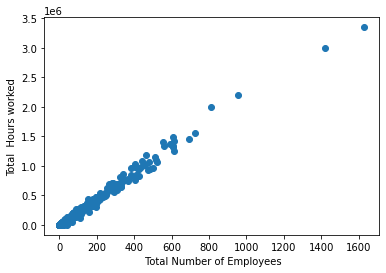

In [7]:
plt.scatter(data.Average_Employees, data.Labor_Hours)
plt.style.use('ggplot')
plt.xlabel(' Total Number of Employees')
plt.ylabel('Total  Hours worked')

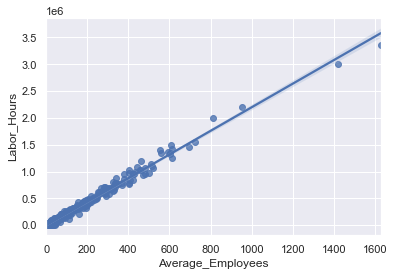

In [8]:
#using seaborn regression plot
import seaborn as sns
sns.set(color_codes=True)
sns.regplot(data.Average_Employees, data.Labor_Hours, ci=95)

Text(0, 0.5, 'Production')

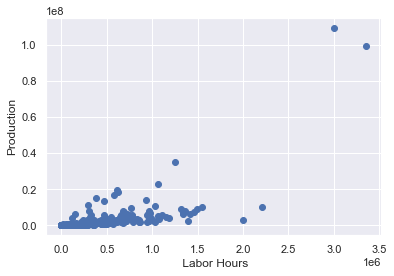

In [9]:
plt.scatter(data.Labor_Hours, data.Production)
plt.style.use('ggplot')
plt.xlabel(' Labor Hours')
plt.ylabel('Production')

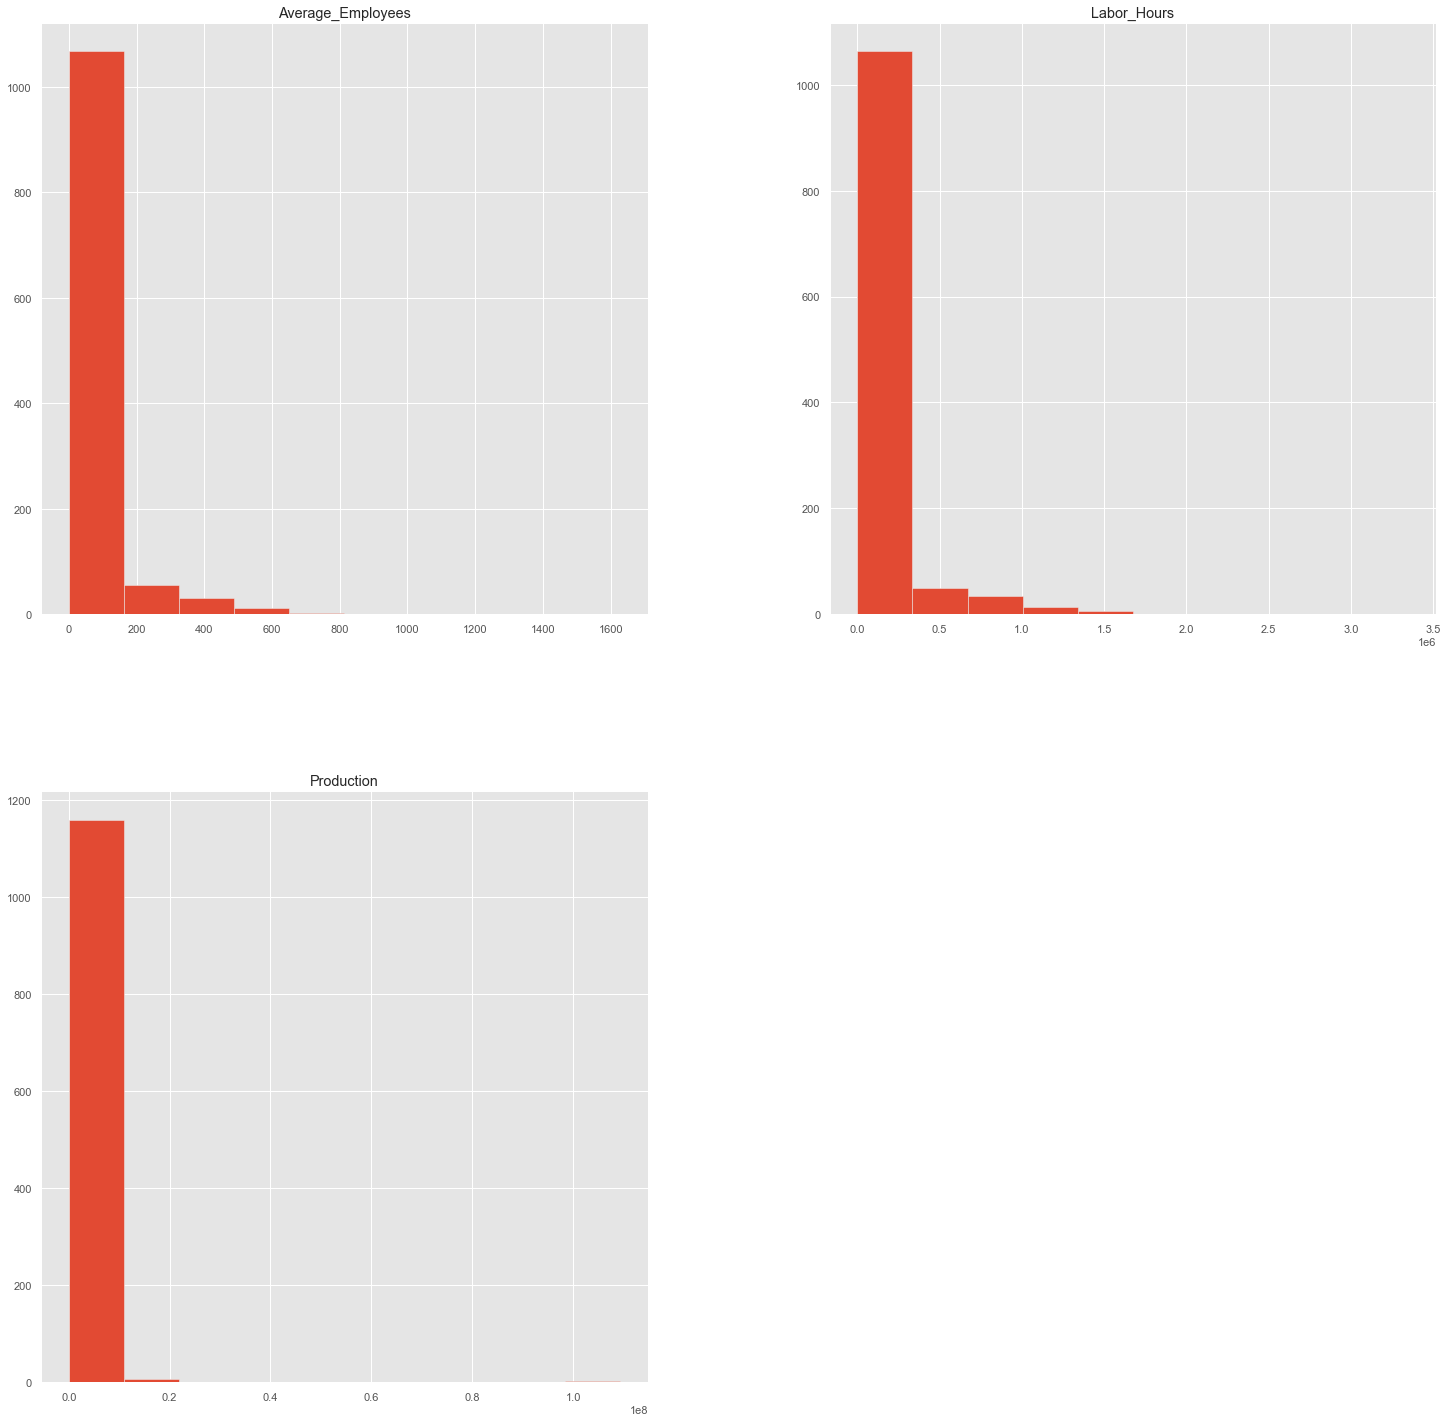

In [10]:
data.hist(figsize=(25,25),bins=10)
plt.style.use('ggplot')
plt.show()

In [11]:
data.shape

(1171, 14)

In [12]:
data.Mine_Status.unique()

array(['Active', 'Temporarily closed', 'Permanently abandoned',
       'Active, men working, not producing'], dtype=object)

In [13]:
#since the goals of this problem is to estimate coal production so that we remove the data with production values is less than 1 or remove the data that mine do not pruduct due to saveral condtion (not producing, emporarily closed and Permanently abandoned)
df = data[data.Production >1 ]
df.head()

,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production,Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,
103381,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100627,Flat Top Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,Mine only,"Cedar Lake Mining, Inc","7802 Highway 78, Cordova, AL 35550",NaN,Appalachia Southern,256521,37,103971


In [14]:
df.shape

(853, 14)

In [15]:
#if we referred to data.hist that previously run indicate that data is skiewed so in order to nominalize it we have to use log transformation 
#create a new column "log_production" 

df["log_production"]= np.log(df['Production'])

<ipython-input-15-b495f7268a5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_production"]= np.log(df['Production'])


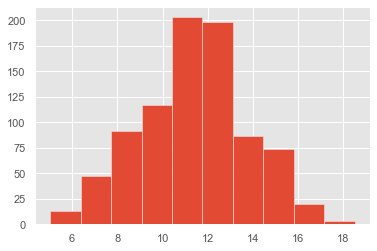

In [16]:
df.log_production.hist()

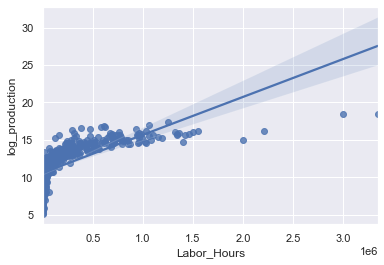

In [17]:
sns.set(color_codes=True)
sns.regplot(df.Labor_Hours, df.log_production, ci=95)


## Feature Engineering

In [18]:
df.Mine_Status.unique()

array(['Active', 'Temporarily closed', 'Permanently abandoned',
       'Active, men working, not producing'], dtype=object)

In [19]:
df[['Mine_Status','Production']].groupby('Mine_Status').mean()

,Production
Mine_Status,
Active,1.588046e+06
"Active, men working, not producing",2.834705e+05
Permanently abandoned,5.949539e+04
Temporarily closed,5.024980e+04


In [20]:
df[['Mine_Status','log_production']].groupby('Mine_Status').mean()

,log_production
Mine_Status,
Active,11.979012
"Active, men working, not producing",11.289035
Permanently abandoned,10.120947
Temporarily closed,9.203329


In [21]:
df.head()

,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production,Average_Employees,Labor_Hours,log_production
MSHA ID,,,,,,,,,,,,,,,
103381,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713,11.044489
103246,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641,10.145688
103451,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729,11.707456
102933,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287,8.278682
100627,Flat Top Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,Mine only,"Cedar Lake Mining, Inc","7802 Highway 78, Cordova, AL 35550",NaN,Appalachia Southern,256521,37,103971,12.454966


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 103381 to 1518524
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mine_Name                  853 non-null    object 
 1   Mine_State                 853 non-null    object 
 2   Mine_County                853 non-null    object 
 3   Mine_Status                853 non-null    object 
 4   Mine_Type                  853 non-null    object 
 5   Company_Type               853 non-null    object 
 6   Operation_Type             853 non-null    object 
 7   Operating_Company          853 non-null    object 
 8   Operating_Company_Address  853 non-null    object 
 9   Union_Code                 54 non-null     object 
 10  Coal_Supply_Region         852 non-null    object 
 11  Production                 853 non-null    int64  
 12  Average_Employees          853 non-null    int64  
 13  Labor_Hours                853 non-null  

In [23]:
df.isnull().sum()

Mine_Name                      0
Mine_State                     0
Mine_County                    0
Mine_Status                    0
Mine_Type                      0
Company_Type                   0
Operation_Type                 0
Operating_Company              0
Operating_Company_Address      0
Union_Code                   799
Coal_Supply_Region             1
Production                     0
Average_Employees              0
Labor_Hours                    0
log_production                 0
dtype: int64

In [24]:
#1 missing value found in Coal_Supply_Region in order to take care the missing value we need to change the nan with mode of the column

#https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93

In [25]:
df.Coal_Supply_Region.unique()

array(['Appalachia Southern', 'Western', 'Interior', 'Uinta Region',
       'Illinois Basin', 'Appalachia Central', 'Appalachia Northern',
       'Powder River Basin', nan], dtype=object)

In [26]:
#cardinality check
df.Coal_Supply_Region.value_counts()

Appalachia Central     397
Appalachia Northern    275
Illinois Basin          66
Appalachia Southern     38
Interior                27
Western                 19
Powder River Basin      16
Uinta Region            14
Name: Coal_Supply_Region, dtype: int64

In [27]:
#replace the missing value with 'Appalachia Central'
df['Coal_Supply_Region'][df['Coal_Supply_Region'].isnull()] = 'Appalachia Central'

<ipython-input-27-eb4a3d4a364a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Coal_Supply_Region'][df['Coal_Supply_Region'].isnull()] = 'Appalachia Central'
C:\Users\Haryono\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
df.isnull().sum()

Mine_Name                      0
Mine_State                     0
Mine_County                    0
Mine_Status                    0
Mine_Type                      0
Company_Type                   0
Operation_Type                 0
Operating_Company              0
Operating_Company_Address      0
Union_Code                   799
Coal_Supply_Region             0
Production                     0
Average_Employees              0
Labor_Hours                    0
log_production                 0
dtype: int64

In [29]:
#After pass previous step we can determine type of column, we can exclue union_code from the tabel due to most off the tata does not union_code

numercial =['Average_Employees',
            'Labor_Hours']

categoricals = ['Mine_State',
               'Mine_County',
               'Mine_Status',
               'Mine_Type',
               'Company_Type',
               'Operation_Type',
               'Coal_Supply_Region']

target = ['log_production'] 


In [30]:
#cardinality chek for categoricals variable
for category in categoricals:
    print(''+category+':  ',len(df[category].unique()))

Mine_State:   29
Mine_County:   151
Mine_Status:   4
Mine_Type:   3
Company_Type:   3
Operation_Type:   2
Coal_Supply_Region:   8


to reduce cardinality we can crate trashold for the value that apears  group the values 

count     29.000000
mean      29.413793
std       46.177853
min        1.000000
25%        3.000000
50%       14.000000
75%       25.000000
max      193.000000
Name: Mine_State, dtype: float64

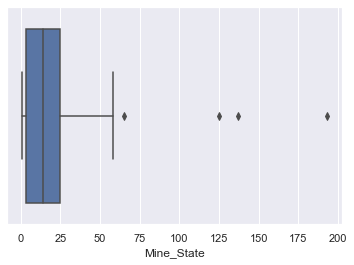

In [31]:
sns.set(color_codes=True)
sns.boxplot(df.Mine_State.value_counts())
df.Mine_State.value_counts().describe()

In [32]:
#Mine_State 
name = df.Mine_State.value_counts() <25
name_df=pd.DataFrame(name)
final=name_df[name_df.Mine_State == True]
final.index
df['Mine_State_with_rare'] = df.Mine_State
for val in final.index:
    df.loc[df.Mine_State == val, 'Mine_State_with_rare'] = 'Rare'

<ipython-input-32-4840e613407b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mine_State_with_rare'] = df.Mine_State
C:\Users\Haryono\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
df.Mine_State_with_rare.value_counts()

Kentucky (East)              193
Rare                         187
Pennsylvania (Bituminous)    137
West Virginia (Southern)     125
Virginia                      65
Pennsylvania (Anthracite)     58
Alabama                       37
West Virginia (Northern)      26
Ohio                          25
Name: Mine_State_with_rare, dtype: int64

count    151.000000
mean       5.649007
std        8.219650
min        1.000000
25%        1.000000
50%        2.000000
75%        6.500000
max       55.000000
Name: Mine_County, dtype: float64

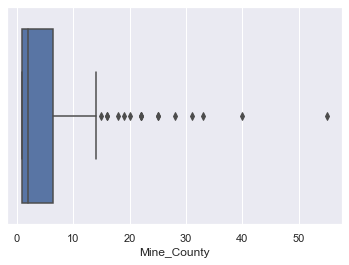

In [34]:
sns.set(color_codes=True)
sns.boxplot(df.Mine_County.value_counts())
df.Mine_County.value_counts().describe()

In [35]:
#Mine_County 
name = df.Mine_County.value_counts() <6.5
name_df=pd.DataFrame(name)
final=name_df[name_df.Mine_County == True]
final.index
df['Mine_County_with_rare'] = df.Mine_County
for val in final.index:
    df.loc[df.Mine_County == val, 'Mine_County_with_rare'] = 'Rare'

<ipython-input-35-eb381455a19a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mine_County_with_rare'] = df.Mine_County
C:\Users\Haryono\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
df.Mine_County_with_rare.value_counts()

Rare              230
Pike               55
Schuylkill         40
Clearfield         33
Mcdowell           31
Buchanan           28
Perry              25
Indiana            25
Harlan             22
Jefferson          22
Logan              22
Somerset           20
Floyd              19
Boone              18
Wise               16
Letcher            16
Northumberland     15
Knox               14
Walker             14
Dickenson          13
Raleigh            13
Bell               12
Campbell           12
Fayette            12
Kanawha            12
Whitley            12
Allegany           10
Cambria             8
Ohio                8
Garrett             8
Claiborne           8
Harrison            8
Greene              8
Armstrong           8
Luzerne             8
Knott               7
Webster             7
Greenbrier          7
Westmoreland        7
Name: Mine_County_with_rare, dtype: int64

In [37]:
del(df['Mine_Name'])
del(df['Union_Code'])
del(df['Operating_Company'])
del(df['Operating_Company_Address'])
del(df['Production'])

In [38]:
del(df['Mine_County'])
del(df['Mine_State'])

In [39]:
numercial =['Average_Employees',
            'Labor_Hours']

categoricals = ['Mine_State_with_rare',
               'Mine_County_with_rare',
               'Mine_Status',
               'Mine_Type',
               'Company_Type',
               'Operation_Type',
               'Coal_Supply_Region']

target = ['log_production'] 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 103381 to 1518524
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mine_Status            853 non-null    object 
 1   Mine_Type              853 non-null    object 
 2   Company_Type           853 non-null    object 
 3   Operation_Type         853 non-null    object 
 4   Coal_Supply_Region     853 non-null    object 
 5   Average_Employees      853 non-null    int64  
 6   Labor_Hours            853 non-null    int64  
 7   log_production         853 non-null    float64
 8   Mine_State_with_rare   853 non-null    object 
 9   Mine_County_with_rare  853 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 73.3+ KB


In [41]:
df_copy = df.copy()
df.shape

(853, 10)

In [42]:
df = df_copy.copy()

In [43]:
#convert cetegorical varables into dummy numeric variables
dummy_categoricals = []
for categorical in categoricals:
    print(categorical)
    temp_df = pd.get_dummies(df[categorical])
    df = pd.concat([df, temp_df],axis =1)

Mine_State_with_rare
Mine_County_with_rare
Mine_Status
Mine_Type
Company_Type
Operation_Type
Coal_Supply_Region


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 103381 to 1518524
Data columns (total 78 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Mine_Status                         853 non-null    object 
 1   Mine_Type                           853 non-null    object 
 2   Company_Type                        853 non-null    object 
 3   Operation_Type                      853 non-null    object 
 4   Coal_Supply_Region                  853 non-null    object 
 5   Average_Employees                   853 non-null    int64  
 6   Labor_Hours                         853 non-null    int64  
 7   log_production                      853 non-null    float64
 8   Mine_State_with_rare                853 non-null    object 
 9   Mine_County_with_rare               853 non-null    object 
 10  Alabama                             853 non-null    uint8  
 11  Kentucky (East)                     

In [45]:
for col in categoricals:
    del(df[col])

In [46]:
df.shape

(853, 71)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 103381 to 1518524
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Average_Employees                   853 non-null    int64  
 1   Labor_Hours                         853 non-null    int64  
 2   log_production                      853 non-null    float64
 3   Alabama                             853 non-null    uint8  
 4   Kentucky (East)                     853 non-null    uint8  
 5   Ohio                                853 non-null    uint8  
 6   Pennsylvania (Anthracite)           853 non-null    uint8  
 7   Pennsylvania (Bituminous)           853 non-null    uint8  
 8   Rare                                853 non-null    uint8  
 9   Virginia                            853 non-null    uint8  
 10  West Virginia (Northern)            853 non-null    uint8  
 11  West Virginia (Southern)            

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 103381 to 1518524
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Average_Employees                   853 non-null    int64  
 1   Labor_Hours                         853 non-null    int64  
 2   log_production                      853 non-null    float64
 3   Alabama                             853 non-null    uint8  
 4   Kentucky (East)                     853 non-null    uint8  
 5   Ohio                                853 non-null    uint8  
 6   Pennsylvania (Anthracite)           853 non-null    uint8  
 7   Pennsylvania (Bituminous)           853 non-null    uint8  
 8   Rare                                853 non-null    uint8  
 9   Virginia                            853 non-null    uint8  
 10  West Virginia (Northern)            853 non-null    uint8  
 11  West Virginia (Southern)            